### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### Reading dataset

In [2]:
dataset = pd.read_csv('diabetes_data_upload.csv')

dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
dataset.shape

(520, 17)

# Data processing

### Checking missing data

In [4]:
missing = dataset.isna()
missing.sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Removing duplicates

In [5]:
dups = dataset.duplicated()
dropped = dataset.drop_duplicates()
dropped.shape

(251, 17)

### Changing from categorical to numerical values

In [6]:
dataset['Gender'] = [1 if g=='Male' else 0 for g in dataset.Gender]
dataset['class'] = [1 if c=='Positive' else 0 for c in dataset.get('class')]

cols_name = list(dataset)
cols_name = cols_name[2:16]

for col in cols_name:
    dataset[col] = [1 if b=='Yes' else 0 for b in dataset.get(col)]

dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Descriptive statistics

### Mean

In [7]:
dataset.mean()

Age                   48.028846
Gender                 0.630769
Polyuria               0.496154
Polydipsia             0.448077
sudden weight loss     0.417308
weakness               0.586538
Polyphagia             0.455769
Genital thrush         0.223077
visual blurring        0.448077
Itching                0.486538
Irritability           0.242308
delayed healing        0.459615
partial paresis        0.430769
muscle stiffness       0.375000
Alopecia               0.344231
Obesity                0.169231
class                  0.615385
dtype: float64

### Median

In [8]:
dataset.median()

Age                   47.5
Gender                 1.0
Polyuria               0.0
Polydipsia             0.0
sudden weight loss     0.0
weakness               1.0
Polyphagia             0.0
Genital thrush         0.0
visual blurring        0.0
Itching                0.0
Irritability           0.0
delayed healing        0.0
partial paresis        0.0
muscle stiffness       0.0
Alopecia               0.0
Obesity                0.0
class                  1.0
dtype: float64

### Standard deviation

In [9]:
dataset.std()

Age                   12.151466
Gender                 0.483061
Polyuria               0.500467
Polydipsia             0.497776
sudden weight loss     0.493589
weakness               0.492928
Polyphagia             0.498519
Genital thrush         0.416710
visual blurring        0.497776
Itching                0.500300
Irritability           0.428892
delayed healing        0.498846
partial paresis        0.495661
muscle stiffness       0.484589
Alopecia               0.475574
Obesity                0.375317
class                  0.486973
dtype: float64

### Preview

In [10]:
dataset.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Positive/Negative

#NEGATIVE:  200
#POSITIVE:  320


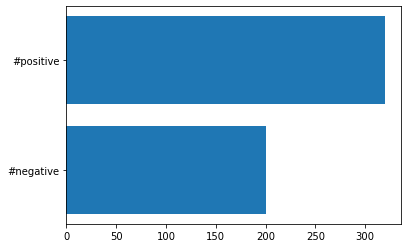

In [11]:
positive_count, negative_count = dataset['class'].value_counts()
plt.barh(["#negative","#positive"], [negative_count, positive_count])
print("#NEGATIVE:  "+ str(negative_count))
print("#POSITIVE:  "+ str(positive_count))

#NEGATIVE:  78
#POSITIVE:  173


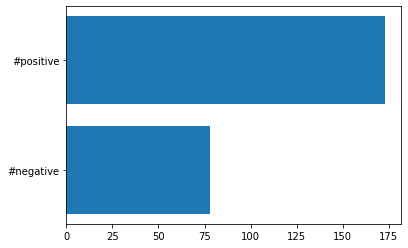

In [12]:
dropped_positive_count, dropped_negative_count = dropped['class'].value_counts()
plt.barh(["#negative","#positive"], [dropped_negative_count, dropped_positive_count])
print("#NEGATIVE:  "+ str(dropped_negative_count))
print("#POSITIVE:  "+ str(dropped_positive_count))

### Balansiranje dataseta - UNDERSAMPLING
Izbacivanje random uzoraka iz klase sa većim brojem instanci

#NEGATIVE:  200
#POSITIVE:  200


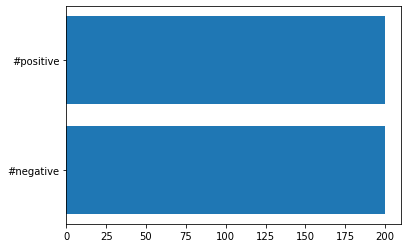

In [13]:
df_majority_US = dataset[dataset['class'] == 1]
df_minority_US = dataset[dataset['class'] == 0]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = negative_count, random_state = 0)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_positive_count, undersampled_negative_count = df_undersampled['class'].value_counts()

plt.barh(["#negative","#positive"], [undersampled_negative_count, undersampled_positive_count])
print("#NEGATIVE:  "+ str(undersampled_negative_count))
print("#POSITIVE:  "+ str(undersampled_positive_count))

### Balansiranje stabla - OVERSAMPLING
Dodavanje duplikata iz klase sa manjim brojem instanci

#NEGATIVE:  320
#POSITIVE:  320


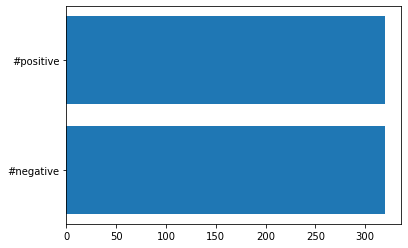

In [14]:
df_majority_OS = dataset[dataset['class'] == 1]
df_minority_OS = dataset[dataset['class'] == 0]

df_minority_upsampled = resample(df_minority_OS, replace=True, n_samples=positive_count, random_state=0)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_positive_count, oversampled_negative_count = df_upsampled['class'].value_counts()

plt.barh(["#negative","#positive"], [oversampled_negative_count, oversampled_positive_count])
print("#NEGATIVE:  "+ str(oversampled_negative_count))
print("#POSITIVE:  "+ str(oversampled_positive_count))

# Podela dataseta na train i test

### bez balansiranja

In [15]:
X_imbalanced = dataset.drop("class",axis=1).values
y_imbalanced = dataset["class"].values

X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

### undersampling

In [16]:
X_undersampled = df_undersampled.drop("class",axis = 1).values
y_undersampled = df_undersampled["class"].values

X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

### upsampling

In [17]:
X_upsampled = df_upsampled.drop("class",axis = 1).values
y_upsampled = df_upsampled["class"].values

X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

# Pomoćne funkcije

## Funkcija za evaluaciju modela

In [18]:
def eval_model(y_true_, y_pred_):
    accuracy = accuracy_score(y_true_, y_pred_)
    f1 = f1_score(y_true_, y_pred_)
    precision = precision_score(y_true_, y_pred_)
    recall = recall_score(y_true_, y_pred_)
    conf_matrix = confusion_matrix(y_true=y_true_, y_pred=y_pred_)
    
    TP = conf_matrix[1,1]
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    print("Accuracy : ", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Confuse matrix:")
    print(conf_matrix)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("True negative: ", TN)
    print("False negative: ", FN)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    
    return accuracy, f1, precision

# Algoritmi za predikciju

## LinearSVC

### bez balansiranja

In [19]:
svc_model = LinearSVC(dual=False, random_state=0)

svc_model.fit(X_train_imbalanced, y_train_imbalanced)
svc_prediction_imbalanced = svc_model.predict(X_test_imbalanced)

# model evaluation
svc_eval_imbalanced = eval_model(y_test_imbalanced, svc_prediction_imbalanced)

Accuracy :  0.9326923076923077
F1 Score:  0.9465648854961831
Precision:  0.9538461538461539
Recall:  0.9393939393939394
Confuse matrix:
[[35  3]
 [ 4 62]]
True positive:  62
False positive:  3
True negative:  35
False negative:  4
Sensitivity:  0.9393939393939394
Specificity:  0.9210526315789473


### undersampling

In [20]:
svc_model = LinearSVC(dual=False, random_state=0)

svc_model.fit(X_train_undersampled, y_train_undersampled)
svc_prediction_undersampled = svc_model.predict(X_test_undersampled)

# model evaluation
svc_eval_undersampled = eval_model(y_test_undersampled, svc_prediction_undersampled)

Accuracy :  0.9125
F1 Score:  0.8955223880597014
Precision:  0.8823529411764706
Recall:  0.9090909090909091
Confuse matrix:
[[43  4]
 [ 3 30]]
True positive:  30
False positive:  4
True negative:  43
False negative:  3
Sensitivity:  0.9090909090909091
Specificity:  0.9148936170212766


### upsampling

In [21]:
svc_model = LinearSVC(dual=False, random_state=0)

svc_model.fit(X_train_upsampled, y_train_upsampled)
svc_prediction_upsampled = svc_model.predict(X_test_upsampled)

# model evaluation
svc_eval_upsampled = eval_model(y_test_upsampled, svc_prediction_upsampled)

Accuracy :  0.9375
F1 Score:  0.9298245614035087
Precision:  0.9137931034482759
Recall:  0.9464285714285714
Confuse matrix:
[[67  5]
 [ 3 53]]
True positive:  53
False positive:  5
True negative:  67
False negative:  3
Sensitivity:  0.9464285714285714
Specificity:  0.9305555555555556


### poređenje bez balansiranja, undersampling, upsampling

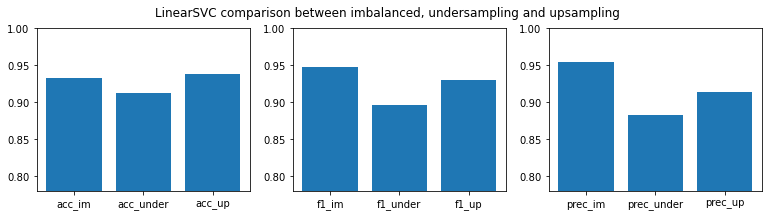

In [22]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(0.78, 1.00)
plt.bar(['acc_im', 'acc_under', 'acc_up'], [svc_eval_imbalanced[0], svc_eval_undersampled[0], svc_eval_upsampled[0]])
plt.subplot(132)
plt.ylim(0.78, 1.00)
plt.bar(['f1_im', 'f1_under','f1_up'], [svc_eval_imbalanced[1], svc_eval_undersampled[1], svc_eval_upsampled[1]])
plt.subplot(133)
plt.ylim(0.78, 1.00)
plt.bar(['prec_im', 'prec_under', 'prec_up'], [svc_eval_imbalanced[2], svc_eval_undersampled[2], svc_eval_upsampled[2]])
plt.suptitle('LinearSVC comparison between imbalanced, undersampling and upsampling')
plt.show()

## Naive Bayes

### bez balansiranja

In [23]:
nb_model = GaussianNB()

nb_model.fit(X_train_imbalanced, y_train_imbalanced)
nb_prediction_imbalanced = nb_model.predict(X_test_imbalanced)

# model evaluation
nb_eval_imbalanced = eval_model(y_test_imbalanced, nb_prediction_imbalanced)

Accuracy :  0.8942307692307693
F1 Score:  0.9172932330827067
Precision:  0.9104477611940298
Recall:  0.9242424242424242
Confuse matrix:
[[32  6]
 [ 5 61]]
True positive:  61
False positive:  6
True negative:  32
False negative:  5
Sensitivity:  0.9242424242424242
Specificity:  0.8421052631578947


### undersampling

In [24]:
nb_model = GaussianNB()

nb_model.fit(X_train_undersampled, y_train_undersampled)
nb_prediction_undersampled = nb_model.predict(X_test_undersampled)

# model evaluation
nb_eval_undersampled = eval_model(y_test_undersampled, nb_prediction_undersampled)

Accuracy :  0.9125
F1 Score:  0.8955223880597014
Precision:  0.8823529411764706
Recall:  0.9090909090909091
Confuse matrix:
[[43  4]
 [ 3 30]]
True positive:  30
False positive:  4
True negative:  43
False negative:  3
Sensitivity:  0.9090909090909091
Specificity:  0.9148936170212766


### upsampling

In [25]:
nb_model = GaussianNB()

nb_model.fit(X_train_upsampled, y_train_upsampled)
nb_prediction_upsampled = nb_model.predict(X_test_upsampled)

# model evaluation
nb_eval_upsampled = eval_model(y_test_upsampled, nb_prediction_upsampled)

Accuracy :  0.8671875
F1 Score:  0.8547008547008548
Precision:  0.819672131147541
Recall:  0.8928571428571429
Confuse matrix:
[[61 11]
 [ 6 50]]
True positive:  50
False positive:  11
True negative:  61
False negative:  6
Sensitivity:  0.8928571428571429
Specificity:  0.8472222222222222


### poređenje bez balansiranja, undersampling, upsampling

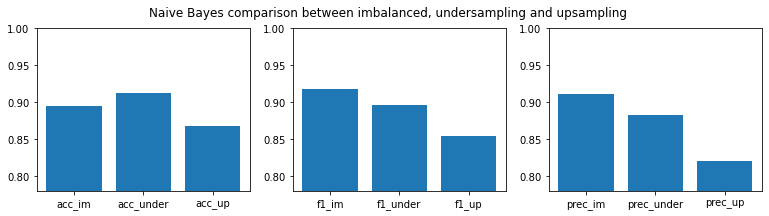

In [26]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(0.78, 1.00)
plt.bar(['acc_im', 'acc_under', 'acc_up'], [nb_eval_imbalanced[0], nb_eval_undersampled[0], nb_eval_upsampled[0]])
plt.subplot(132)
plt.ylim(0.78, 1.00)
plt.bar(['f1_im', 'f1_under','f1_up'], [nb_eval_imbalanced[1], nb_eval_undersampled[1], nb_eval_upsampled[1]])
plt.subplot(133)
plt.ylim(0.78, 1.00)
plt.bar(['prec_im', 'prec_under', 'prec_up'], [nb_eval_imbalanced[2], nb_eval_undersampled[2], nb_eval_upsampled[2]])
plt.suptitle('Naive Bayes comparison between imbalanced, undersampling and upsampling')
plt.show()

## K-Nearest Neighbors

### bez balansiranja

In [27]:
scaler = StandardScaler()
X_train_imbalanced_transformed = scaler.fit_transform(X_train_imbalanced)
X_test_imbalanced_transformed = scaler.transform(X_test_imbalanced)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_imbalanced_transformed, y_train_imbalanced)
knn_prediction_imbalanced = classifier.predict(X_test_imbalanced_transformed)

# model evaluation
knn_eval_imbalanced = eval_model(y_test_imbalanced, knn_prediction_imbalanced)

Accuracy :  0.8846153846153846
F1 Score:  0.9032258064516129
Precision:  0.9655172413793104
Recall:  0.8484848484848485
Confuse matrix:
[[36  2]
 [10 56]]
True positive:  56
False positive:  2
True negative:  36
False negative:  10
Sensitivity:  0.8484848484848485
Specificity:  0.9473684210526315


### undersampling

In [28]:
scaler = StandardScaler()
X_train_undersampled_transformed = scaler.fit_transform(X_train_undersampled)
X_test_undersampled_transformed = scaler.transform(X_test_undersampled)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_undersampled_transformed, y_train_undersampled)
knn_prediction_undersampled = classifier.predict(X_test_undersampled_transformed)

# model evaluation
knn_eval_undersampled = eval_model(y_test_undersampled, knn_prediction_undersampled)

Accuracy :  0.95
F1 Score:  0.9374999999999999
Precision:  0.967741935483871
Recall:  0.9090909090909091
Confuse matrix:
[[46  1]
 [ 3 30]]
True positive:  30
False positive:  1
True negative:  46
False negative:  3
Sensitivity:  0.9090909090909091
Specificity:  0.9787234042553191


### upsampling

In [29]:
scaler = StandardScaler()
X_train_upsampled_transformed = scaler.fit_transform(X_train_upsampled)
X_test_upsampled_transformed = scaler.transform(X_test_upsampled)

classifier = KNeighborsClassifier(n_neighbors=5) # 3 NAJBOLJI REZULTAT
classifier.fit(X_train_upsampled_transformed, y_train_upsampled)
knn_prediction_upsampled = classifier.predict(X_test_upsampled_transformed)

# model evaluation
knn_eval_upsampled = eval_model(y_test_upsampled, knn_prediction_upsampled)

Accuracy :  0.9609375
F1 Score:  0.9541284403669724
Precision:  0.9811320754716981
Recall:  0.9285714285714286
Confuse matrix:
[[71  1]
 [ 4 52]]
True positive:  52
False positive:  1
True negative:  71
False negative:  4
Sensitivity:  0.9285714285714286
Specificity:  0.9861111111111112


### poređenje bez balansiranja, undersampling, upsampling

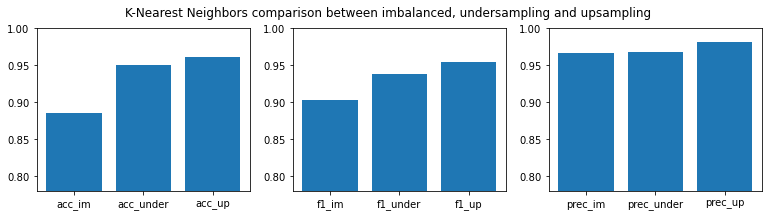

In [30]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(0.78, 1.00)
plt.bar(['acc_im', 'acc_under', 'acc_up'], [knn_eval_imbalanced[0], knn_eval_undersampled[0], knn_eval_upsampled[0]])
plt.subplot(132)
plt.ylim(0.78, 1.00)
plt.bar(['f1_im', 'f1_under','f1_up'], [knn_eval_imbalanced[1], knn_eval_undersampled[1], knn_eval_upsampled[1]])
plt.subplot(133)
plt.ylim(0.78, 1.00)
plt.bar(['prec_im', 'prec_under', 'prec_up'], [knn_eval_imbalanced[2], knn_eval_undersampled[2], knn_eval_upsampled[2]])
plt.suptitle('K-Nearest Neighbors comparison between imbalanced, undersampling and upsampling')
plt.show()

## Logistic Regression

### bez balansiranja

In [31]:
lr_model = LogisticRegression(max_iter = 3000)
lr_model.fit(X_train_imbalanced, y_train_imbalanced)
lr_prediction_imbalanced = lr_model.predict(X_test_imbalanced)

# model evaluation
lr_eval_imbalanced = eval_model(y_test_imbalanced, lr_prediction_imbalanced)

Accuracy :  0.9038461538461539
F1 Score:  0.923076923076923
Precision:  0.9375
Recall:  0.9090909090909091
Confuse matrix:
[[34  4]
 [ 6 60]]
True positive:  60
False positive:  4
True negative:  34
False negative:  6
Sensitivity:  0.9090909090909091
Specificity:  0.8947368421052632


In [32]:
scaler = StandardScaler()
X_train_imbalanced_transformed = scaler.fit_transform(X_train_imbalanced)
X_test_imbalanced_transformed = scaler.transform(X_test_imbalanced)

lr_model = LogisticRegression(random_state=0, class_weight="balanced")
lr_model.fit(X_train_imbalanced_transformed, y_train_imbalanced)
lr_prediction_imbalanced = lr_model.predict(X_test_imbalanced_transformed)

# model evaluation
eval_model(y_test_imbalanced, lr_prediction_imbalanced)

Accuracy :  0.9134615384615384
F1 Score:  0.9291338582677166
Precision:  0.9672131147540983
Recall:  0.8939393939393939
Confuse matrix:
[[36  2]
 [ 7 59]]
True positive:  59
False positive:  2
True negative:  36
False negative:  7
Sensitivity:  0.8939393939393939
Specificity:  0.9473684210526315


(0.9134615384615384, 0.9291338582677166, 0.9672131147540983)

### undersampling

In [33]:
lr_model = LogisticRegression(max_iter = 3000)
lr_model.fit(X_train_undersampled, y_train_undersampled)
lr_prediction_undersampled = lr_model.predict(X_test_undersampled)

# model evaluation
lr_eval_undersampled = eval_model(y_test_undersampled, lr_prediction_undersampled)

Accuracy :  0.9125
F1 Score:  0.8955223880597014
Precision:  0.8823529411764706
Recall:  0.9090909090909091
Confuse matrix:
[[43  4]
 [ 3 30]]
True positive:  30
False positive:  4
True negative:  43
False negative:  3
Sensitivity:  0.9090909090909091
Specificity:  0.9148936170212766


### upsampling

In [34]:
scaler = StandardScaler()
X_train_upsampled_transformed = scaler.fit_transform(X_train_upsampled)
X_test_upsampled_transformed = scaler.transform(X_test_upsampled)

lr_model = LogisticRegression(max_iter = 3000)
lr_model.fit(X_train_upsampled_transformed, y_train_upsampled)
lr_prediction_upsampled = lr_model.predict(X_test_upsampled_transformed)

# model evaluation
lr_eval_upsampled = eval_model(y_test_upsampled, lr_prediction_upsampled)

Accuracy :  0.9296875
F1 Score:  0.923076923076923
Precision:  0.8852459016393442
Recall:  0.9642857142857143
Confuse matrix:
[[65  7]
 [ 2 54]]
True positive:  54
False positive:  7
True negative:  65
False negative:  2
Sensitivity:  0.9642857142857143
Specificity:  0.9027777777777778


### poređenje bez balansiranja, undersampling, upsampling

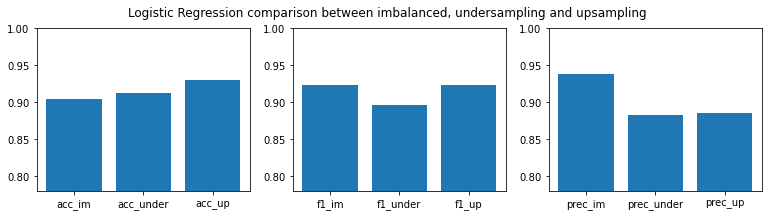

In [35]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(0.78, 1.00)
plt.bar(['acc_im', 'acc_under', 'acc_up'], [lr_eval_imbalanced[0], lr_eval_undersampled[0], lr_eval_upsampled[0]])
plt.subplot(132)
plt.ylim(0.78, 1.00)
plt.bar(['f1_im', 'f1_under','f1_up'], [lr_eval_imbalanced[1], lr_eval_undersampled[1], lr_eval_upsampled[1]])
plt.subplot(133)
plt.ylim(0.78, 1.00)
plt.bar(['prec_im', 'prec_under', 'prec_up'], [lr_eval_imbalanced[2], lr_eval_undersampled[2], lr_eval_upsampled[2]])
plt.suptitle('Logistic Regression comparison between imbalanced, undersampling and upsampling')
plt.show()

## Decision tree

### bez balansiranja

In [36]:
dt_classifier = DecisionTreeClassifier(random_state=0)

dt_classifier.fit(X_train_imbalanced, y_train_imbalanced)
dt_prediction_imbalanced = dt_classifier.predict(X_test_imbalanced)

# model evaluation
dt_eval_imbalanced = eval_model(y_test_imbalanced, dt_prediction_imbalanced)

Accuracy :  0.9711538461538461
F1 Score:  0.9777777777777777
Precision:  0.9565217391304348
Recall:  1.0
Confuse matrix:
[[35  3]
 [ 0 66]]
True positive:  66
False positive:  3
True negative:  35
False negative:  0
Sensitivity:  1.0
Specificity:  0.9210526315789473


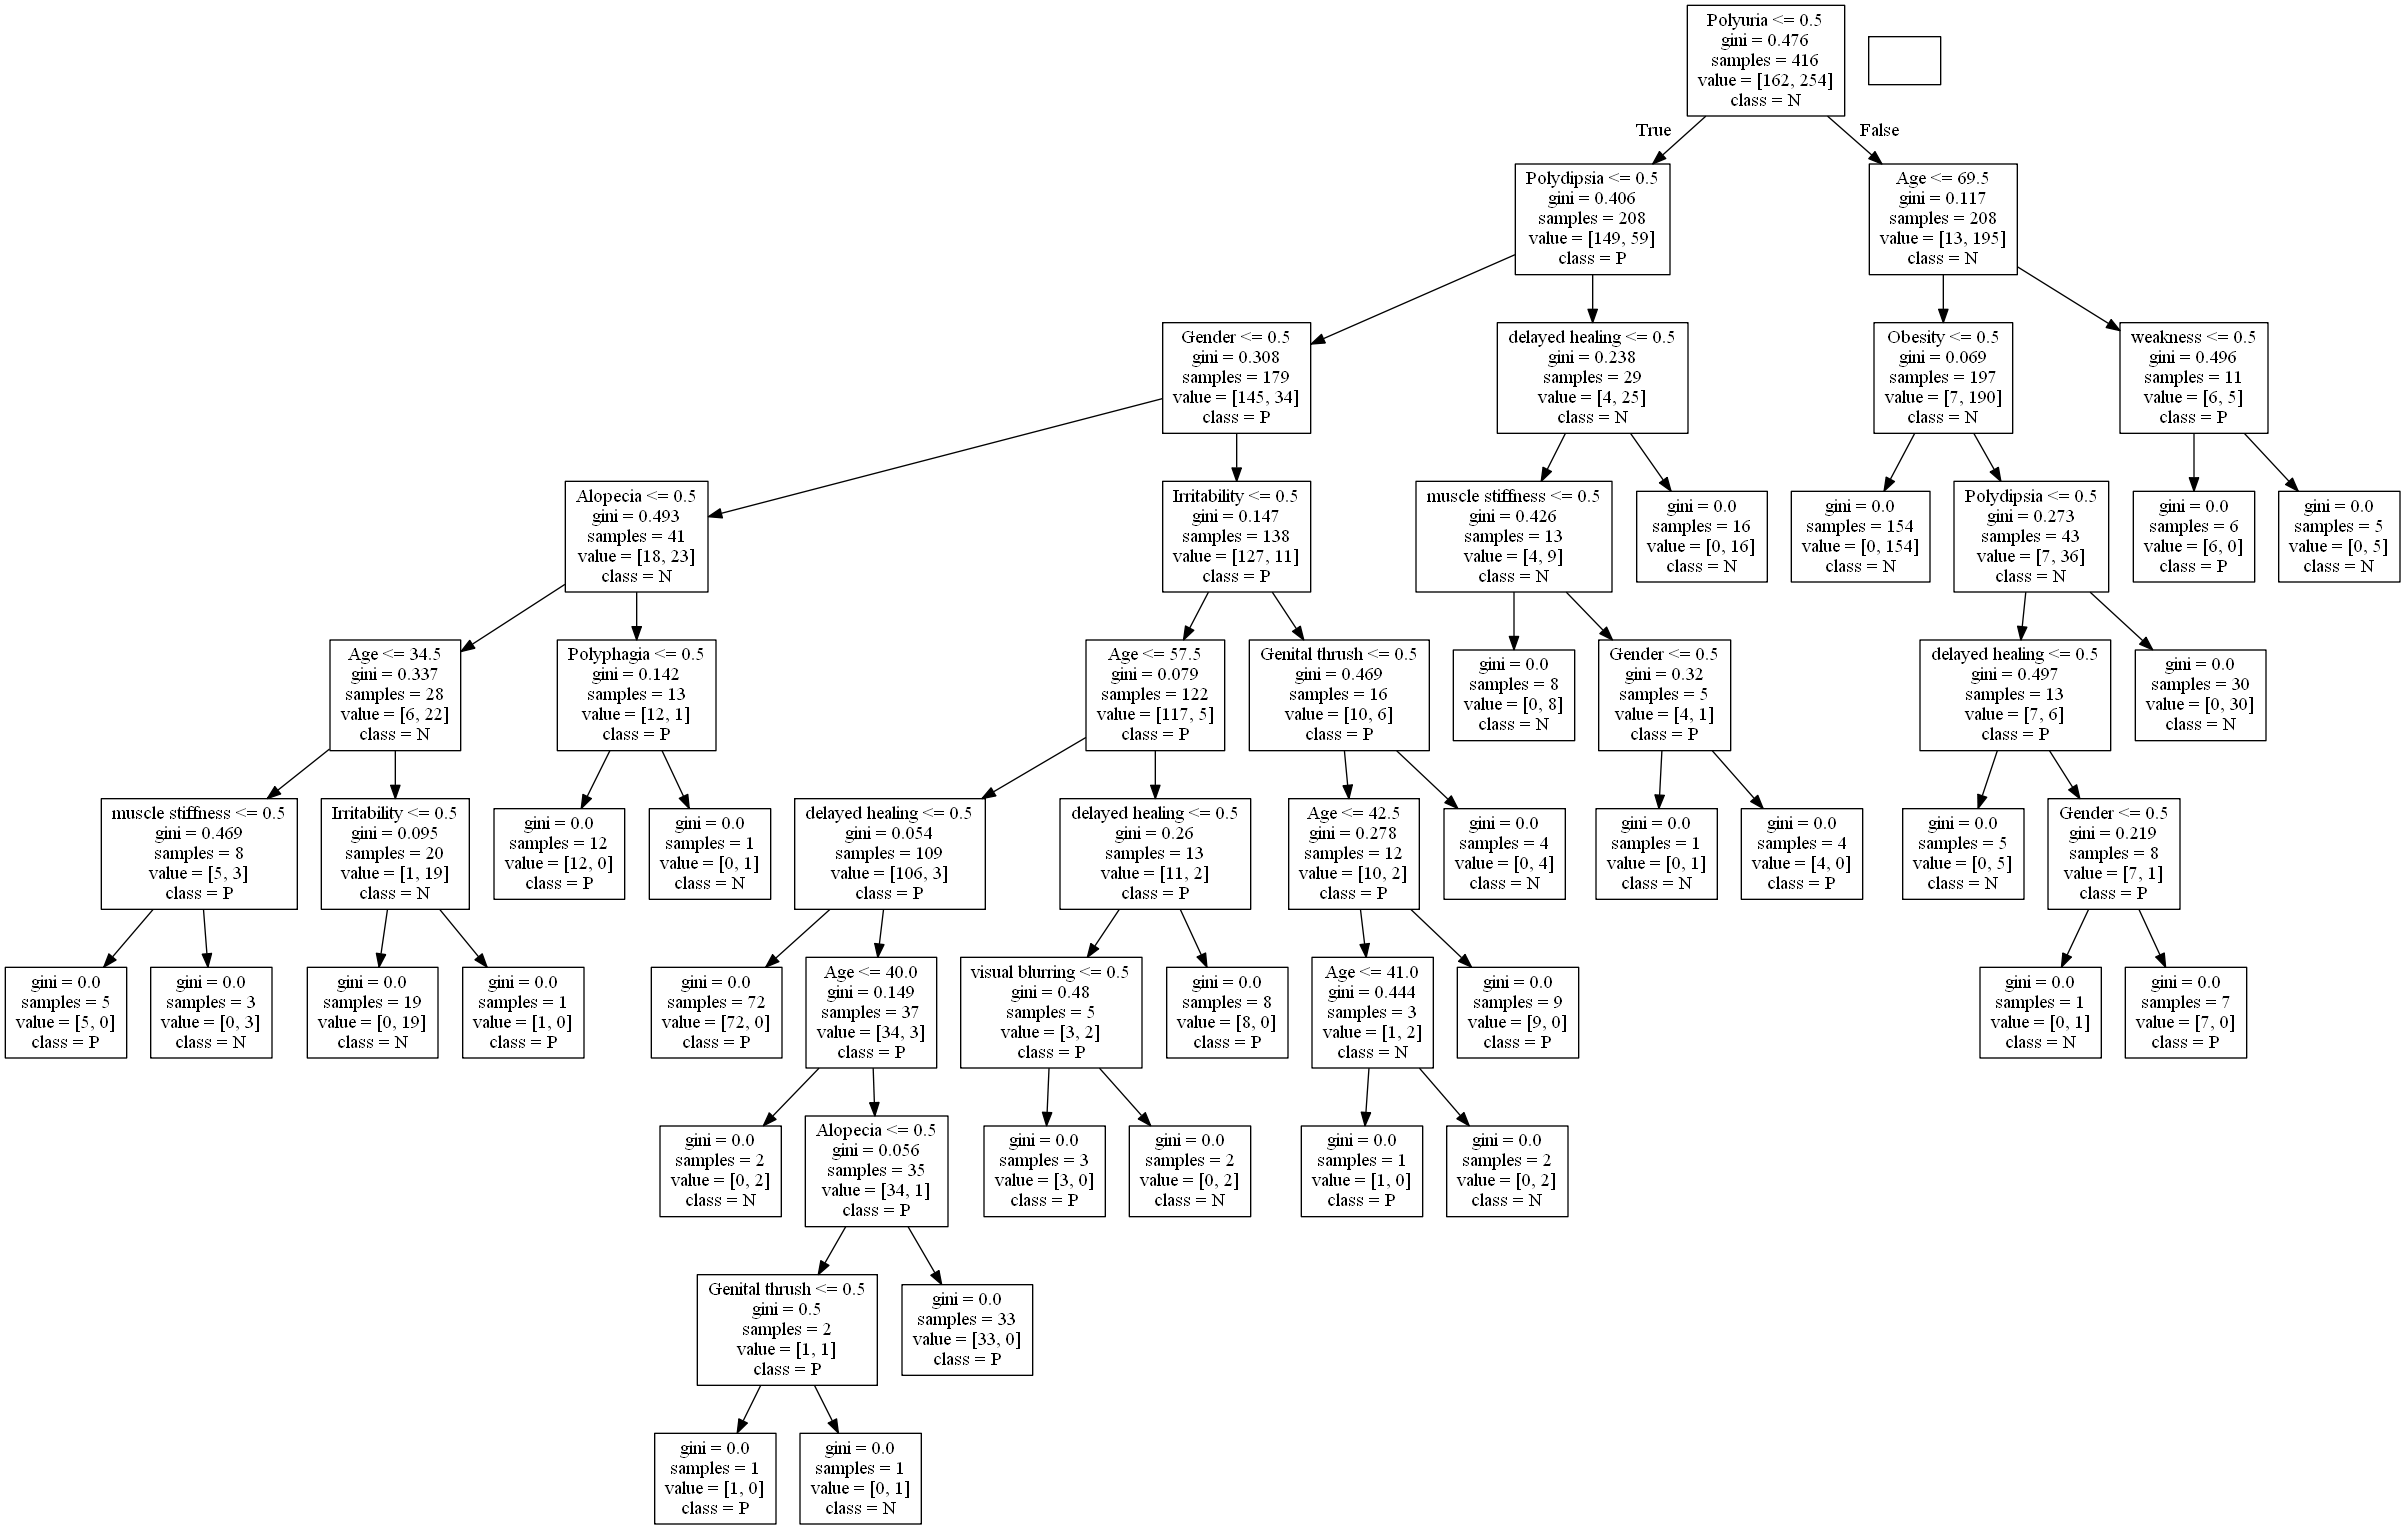

In [37]:
import pydotplus
from IPython.display import Image

cn=['P','N']

dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names=dataset.columns[:16], class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### undersampling

In [38]:
dt_classifier = DecisionTreeClassifier(random_state=0)

dt_classifier.fit(X_train_undersampled, y_train_undersampled)
dt_prediction_undersampled = dt_classifier.predict(X_test_undersampled)

# model evaluation
dt_eval_undersampled = eval_model(y_test_undersampled, dt_prediction_undersampled)

Accuracy :  0.9625
F1 Score:  0.9538461538461539
Precision:  0.96875
Recall:  0.9393939393939394
Confuse matrix:
[[46  1]
 [ 2 31]]
True positive:  31
False positive:  1
True negative:  46
False negative:  2
Sensitivity:  0.9393939393939394
Specificity:  0.9787234042553191


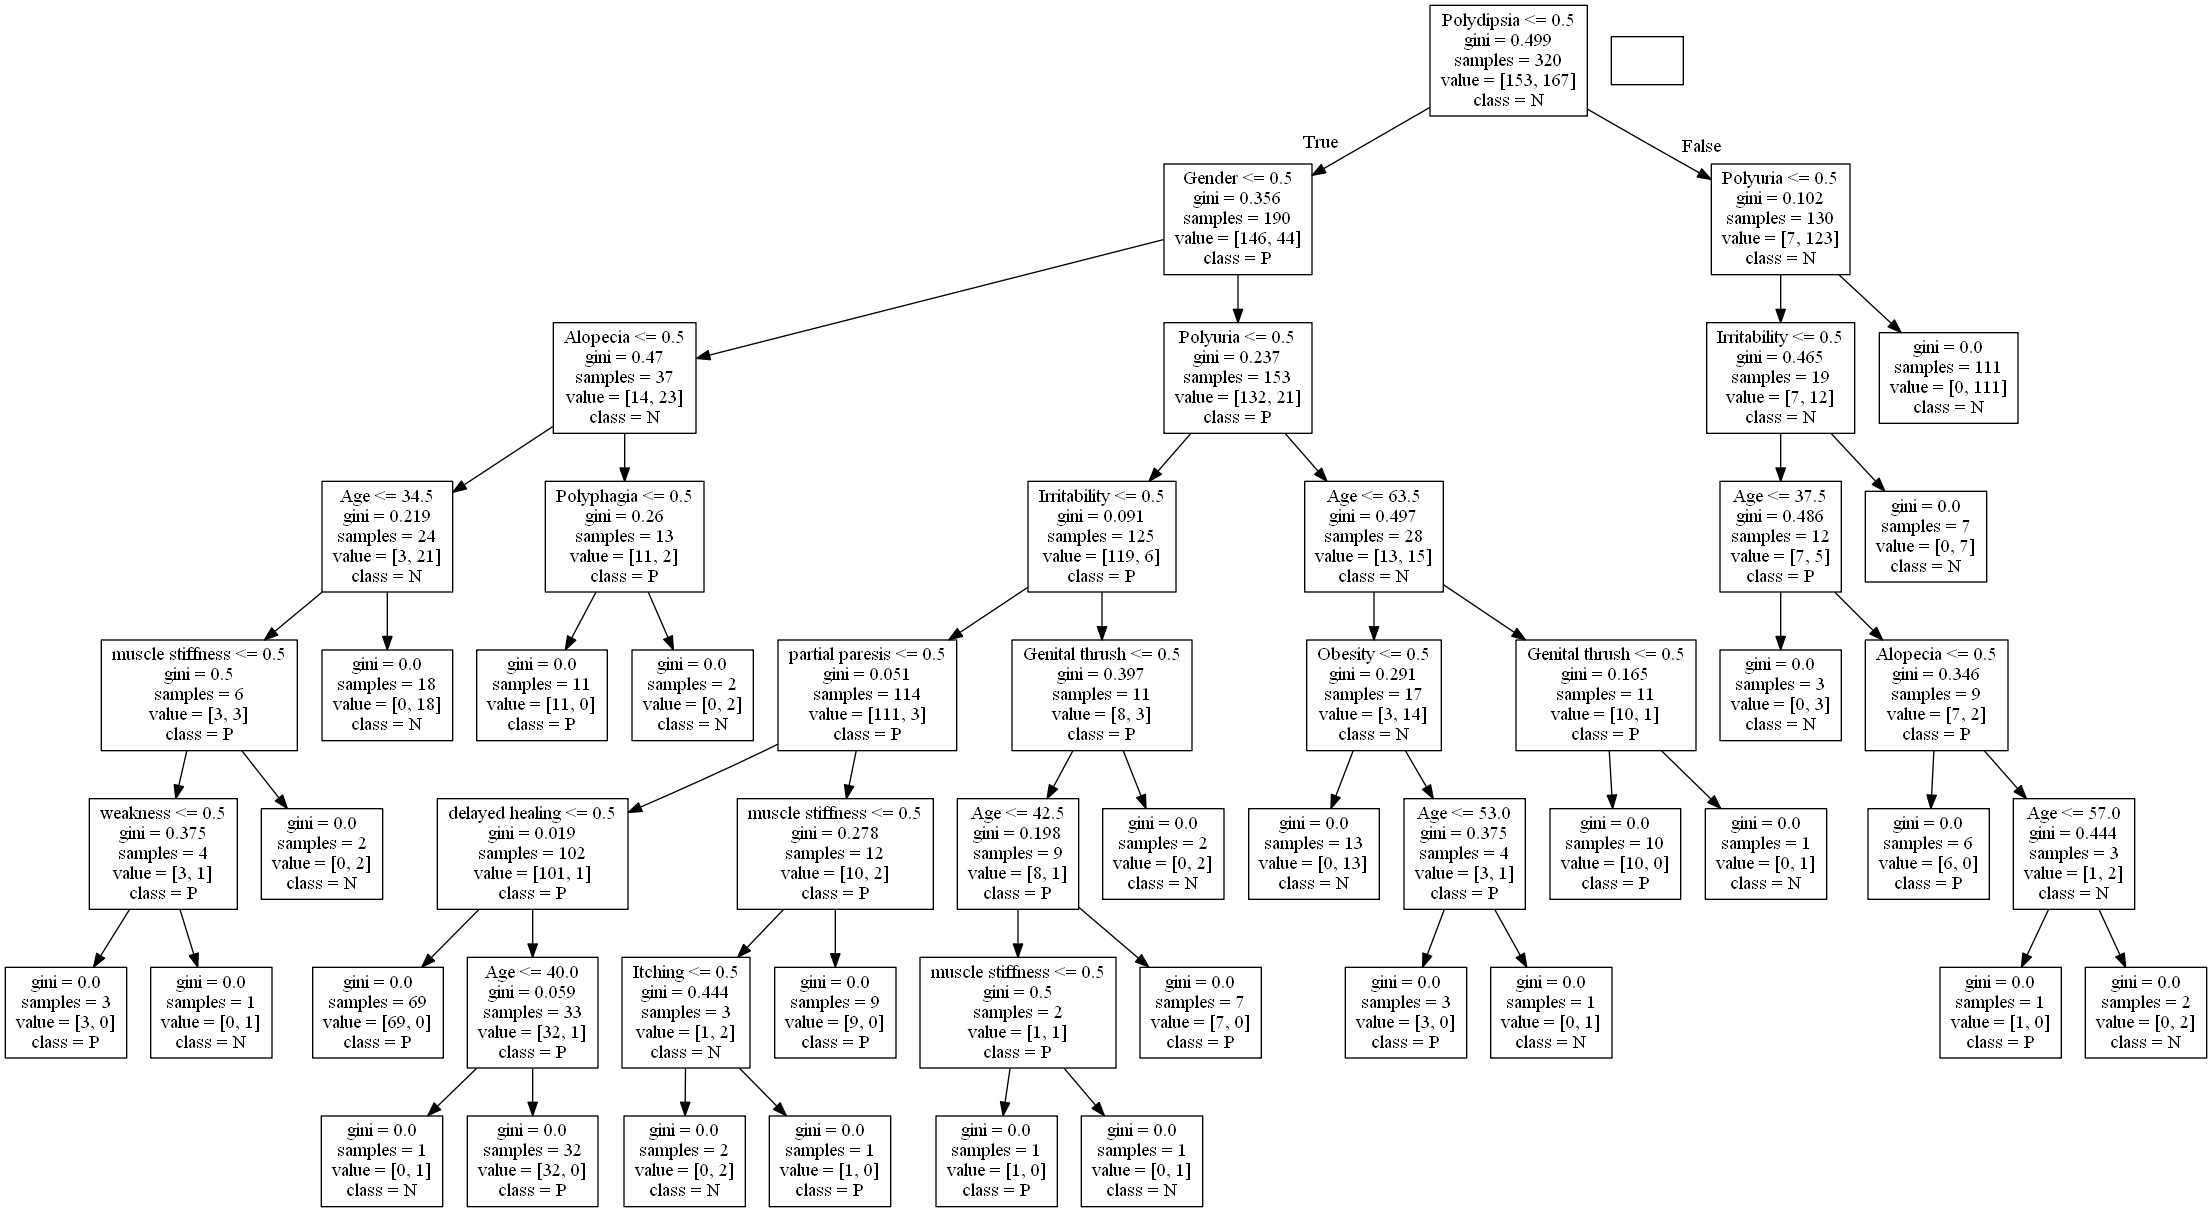

In [39]:
import pydotplus
from IPython.display import Image

cn=['P','N']

dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names=dataset.columns[:16], class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### upsampling

In [40]:
dt_classifier = DecisionTreeClassifier(random_state=0)

dt_classifier.fit(X_train_upsampled, y_train_upsampled)
dt_prediction_upsampled = dt_classifier.predict(X_test_upsampled)

# model evaluation
dt_eval_upsampled = eval_model(y_test_upsampled, dt_prediction_upsampled)

Accuracy :  0.9765625
F1 Score:  0.9724770642201834
Precision:  1.0
Recall:  0.9464285714285714
Confuse matrix:
[[72  0]
 [ 3 53]]
True positive:  53
False positive:  0
True negative:  72
False negative:  3
Sensitivity:  0.9464285714285714
Specificity:  1.0


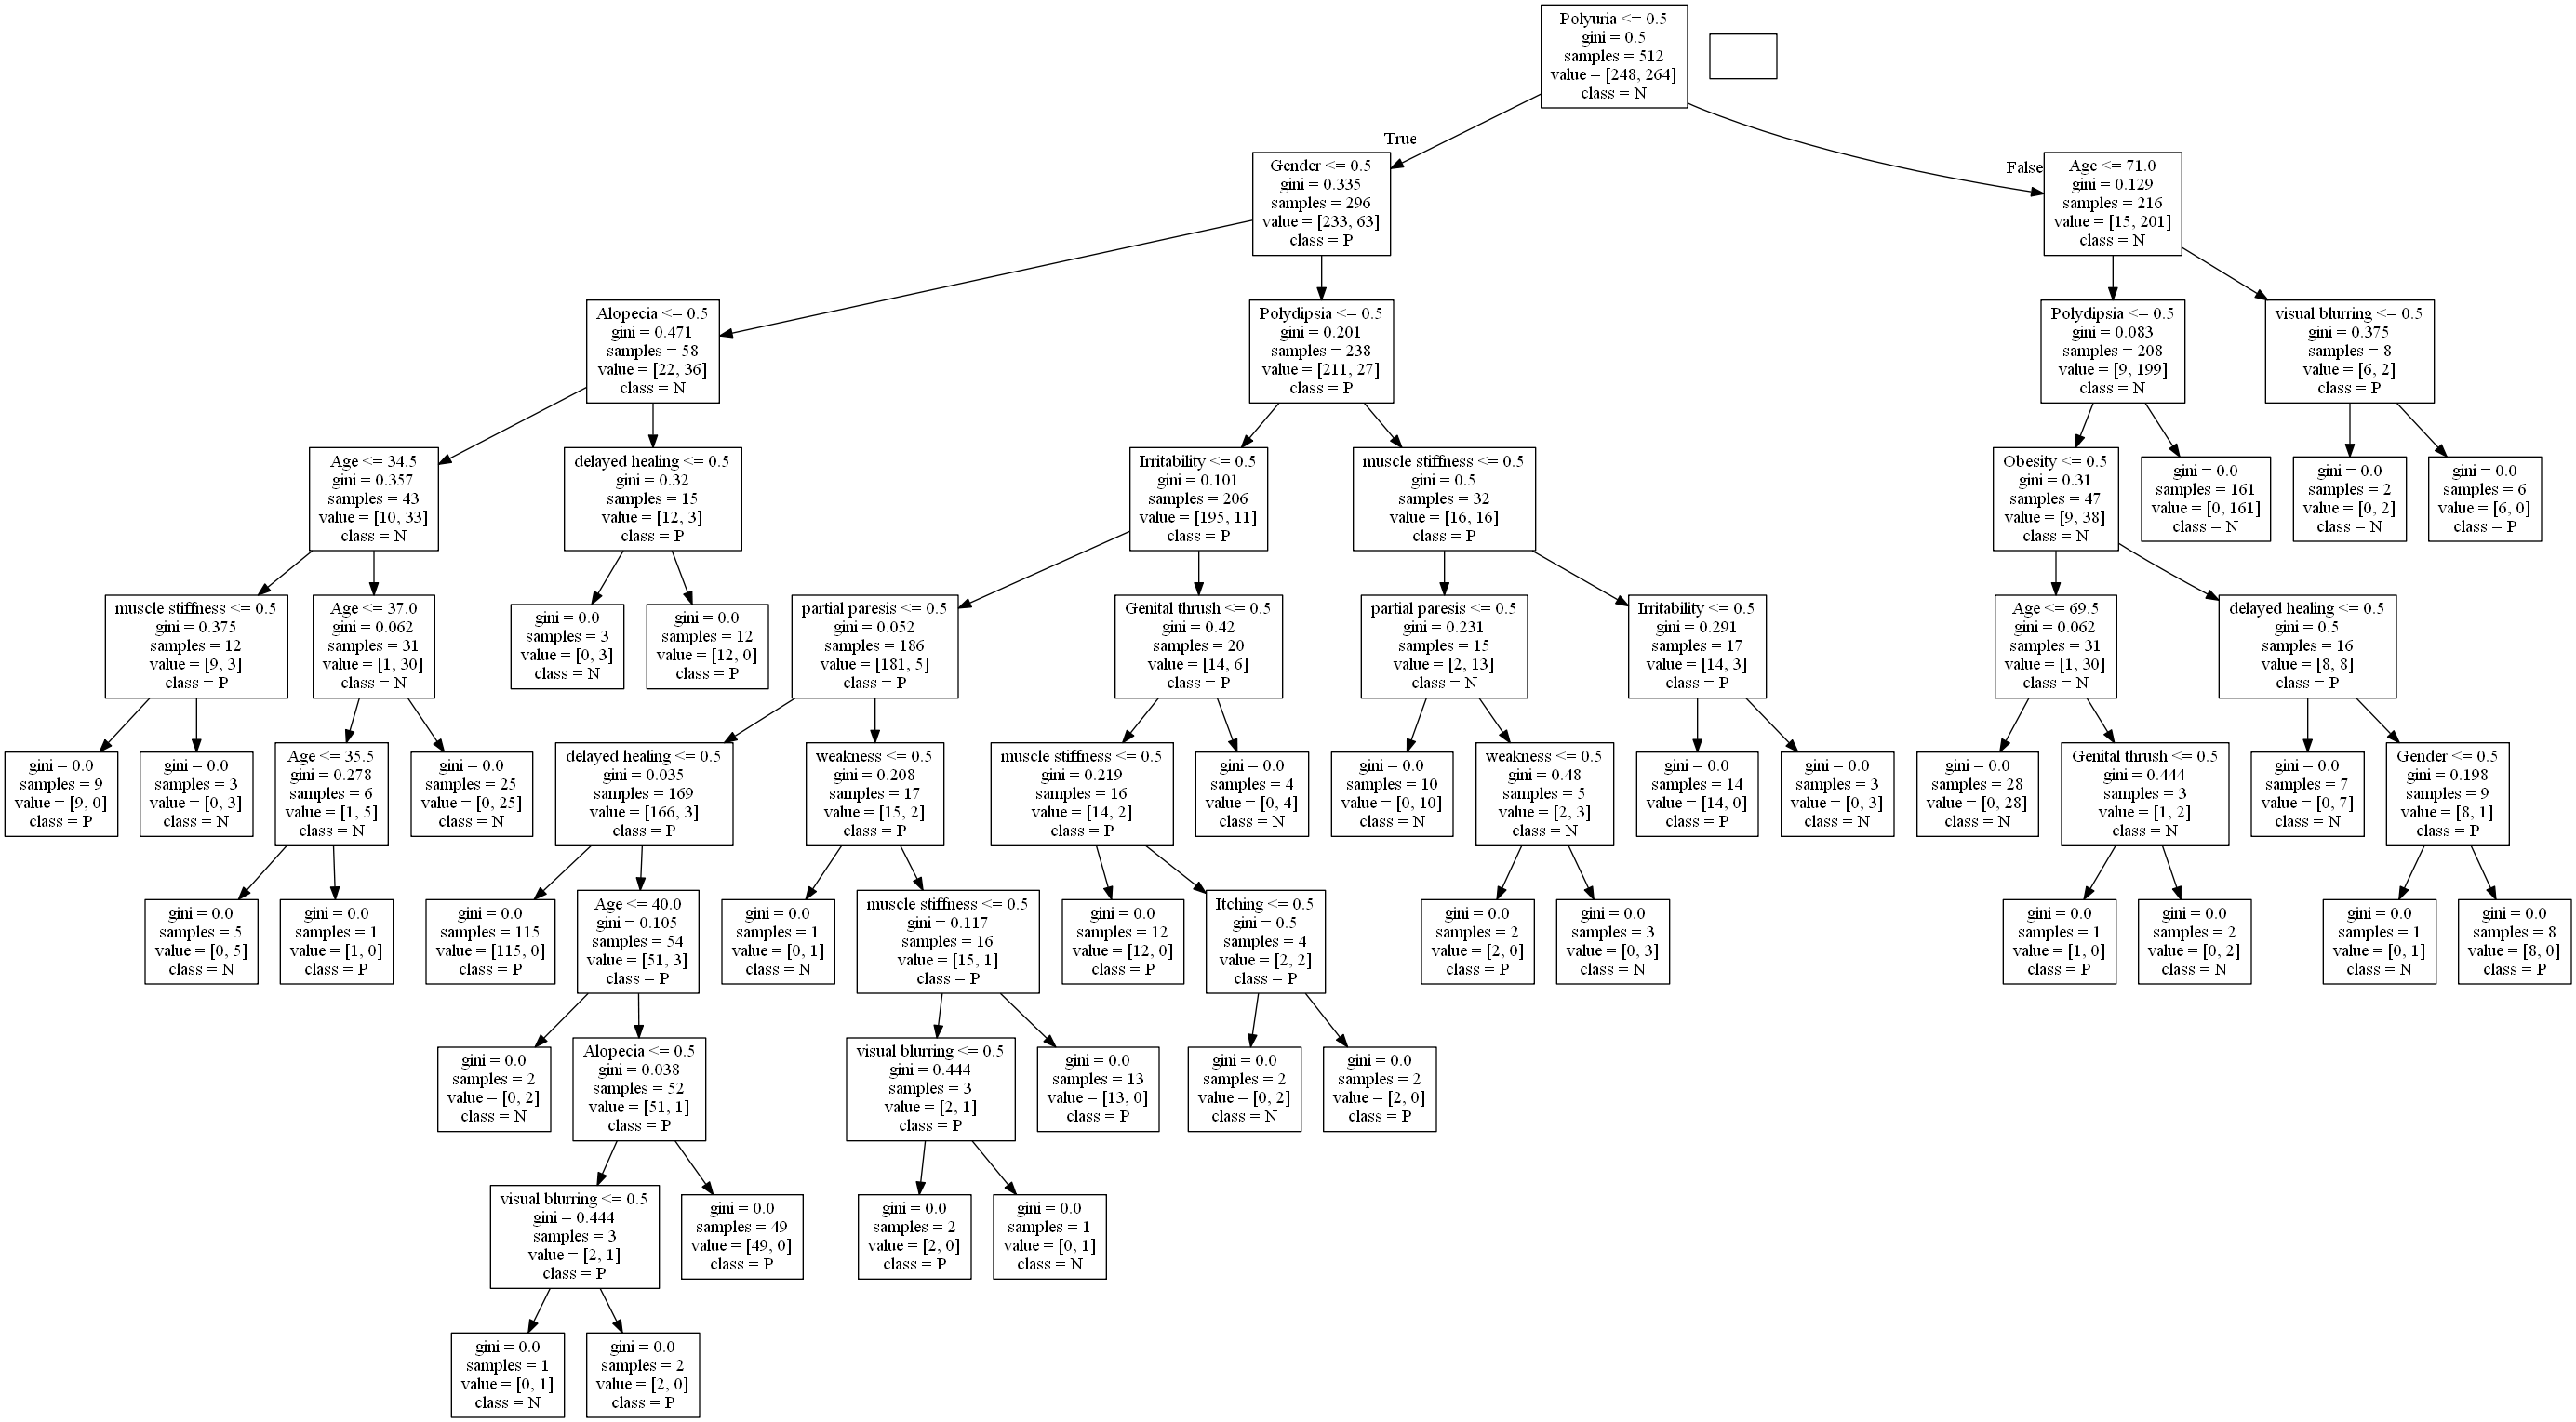

In [41]:
import pydotplus
from IPython.display import Image

cn=['P','N']

dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names=dataset.columns[:16], class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### poređenje bez balansiranja, undersampling, upsampling

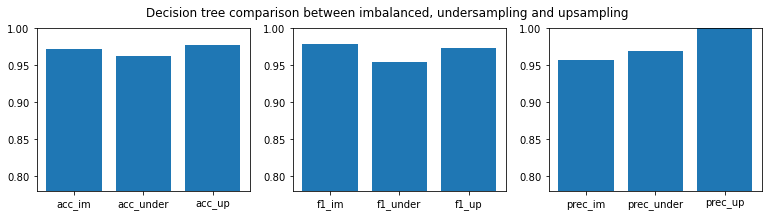

In [42]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(0.78, 1.00)
plt.bar(['acc_im', 'acc_under', 'acc_up'], [dt_eval_imbalanced[0], dt_eval_undersampled[0], dt_eval_upsampled[0]])
plt.subplot(132)
plt.ylim(0.78, 1.00)
plt.bar(['f1_im', 'f1_under','f1_up'], [dt_eval_imbalanced[1], dt_eval_undersampled[1], dt_eval_upsampled[1]])
plt.subplot(133)
plt.ylim(0.78, 1.00)
plt.bar(['prec_im', 'prec_under', 'prec_up'], [dt_eval_imbalanced[2], dt_eval_undersampled[2], dt_eval_upsampled[2]])
plt.suptitle('Decision tree comparison between imbalanced, undersampling and upsampling')
plt.show()

## Gradient Boost

### bez balansiranja

In [43]:
gb_model = GradientBoostingClassifier(learning_rate=0.1)

#params = gb_model.get_params()

gb_model.fit(X_train_imbalanced, y_train_imbalanced)
gb_prediction_imbalanced = gb_model.predict(X_test_imbalanced)

# model evaluation
gb_eval_imbalanced = eval_model(y_test_imbalanced, gb_prediction_imbalanced)

Accuracy :  0.9807692307692307
F1 Score:  0.9850746268656716
Precision:  0.9705882352941176
Recall:  1.0
Confuse matrix:
[[36  2]
 [ 0 66]]
True positive:  66
False positive:  2
True negative:  36
False negative:  0
Sensitivity:  1.0
Specificity:  0.9473684210526315


### undersampling

In [44]:
gb_model = GradientBoostingClassifier(learning_rate=0.1)

#params = gb_model.get_params()

gb_model.fit(X_train_undersampled, y_train_undersampled)
gb_prediction_undersampled = gb_model.predict(X_test_undersampled)

# model evaluation
gb_eval_undersampled = eval_model(y_test_undersampled, gb_prediction_undersampled)

Accuracy :  0.925
F1 Score:  0.90625
Precision:  0.9354838709677419
Recall:  0.8787878787878788
Confuse matrix:
[[45  2]
 [ 4 29]]
True positive:  29
False positive:  2
True negative:  45
False negative:  4
Sensitivity:  0.8787878787878788
Specificity:  0.9574468085106383


### upsampling

In [45]:
gb_model = GradientBoostingClassifier(learning_rate=0.1)

#params = gb_model.get_params()

gb_model.fit(X_train_upsampled, y_train_upsampled)
gb_prediction_upsampled = gb_model.predict(X_test_upsampled)

# model evaluation
gb_eval_upsampled = eval_model(y_test_upsampled, gb_prediction_upsampled)

Accuracy :  0.984375
F1 Score:  0.9821428571428571
Precision:  0.9821428571428571
Recall:  0.9821428571428571
Confuse matrix:
[[71  1]
 [ 1 55]]
True positive:  55
False positive:  1
True negative:  71
False negative:  1
Sensitivity:  0.9821428571428571
Specificity:  0.9861111111111112


### poređenje bez balansiranja, undersampling, upsampling

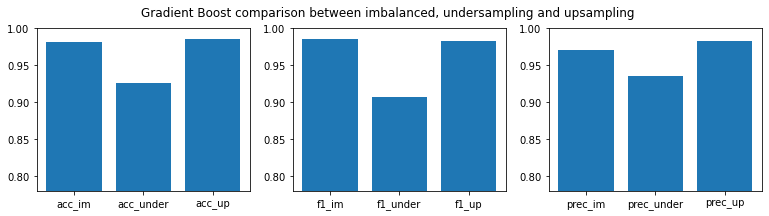

In [46]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(0.78, 1.00)
plt.bar(['acc_im', 'acc_under', 'acc_up'], [gb_eval_imbalanced[0], gb_eval_undersampled[0], gb_eval_upsampled[0]])
plt.subplot(132)
plt.ylim(0.78, 1.00)
plt.bar(['f1_im', 'f1_under','f1_up'], [gb_eval_imbalanced[1], gb_eval_undersampled[1], gb_eval_upsampled[1]])
plt.subplot(133)
plt.ylim(0.78, 1.00)
plt.bar(['prec_im', 'prec_under', 'prec_up'], [gb_eval_imbalanced[2], gb_eval_undersampled[2], gb_eval_upsampled[2]])
plt.suptitle('Gradient Boost comparison between imbalanced, undersampling and upsampling')
plt.show()

## Random forest

### bez balansiranja

In [47]:
rf_model = RandomForestClassifier(max_depth=25, random_state=0)

rf_model.fit(X_train_imbalanced,y_train_imbalanced)
rf_prediction_imbalanced = rf_model.predict(X_test_imbalanced)

# model evaluation
rf_eval_imbalanced = eval_model(y_test_imbalanced, rf_prediction_imbalanced)

Accuracy :  0.9807692307692307
F1 Score:  0.9850746268656716
Precision:  0.9705882352941176
Recall:  1.0
Confuse matrix:
[[36  2]
 [ 0 66]]
True positive:  66
False positive:  2
True negative:  36
False negative:  0
Sensitivity:  1.0
Specificity:  0.9473684210526315


### undersampling

In [48]:
rf_model = RandomForestClassifier(max_depth=25, random_state=0)

rf_model.fit(X_train_undersampled, y_train_undersampled)
rf_prediction_undersampled = rf_model.predict(X_test_undersampled)

# model evaluation
rf_eval_undersampled = eval_model(y_test_undersampled, rf_prediction_undersampled)

Accuracy :  0.95
F1 Score:  0.9374999999999999
Precision:  0.967741935483871
Recall:  0.9090909090909091
Confuse matrix:
[[46  1]
 [ 3 30]]
True positive:  30
False positive:  1
True negative:  46
False negative:  3
Sensitivity:  0.9090909090909091
Specificity:  0.9787234042553191


### upsampling

In [49]:
rf_model = RandomForestClassifier(max_depth=25, random_state=0)

rf_model.fit(X_train_upsampled, y_train_upsampled)
rf_prediction_upsampled = rf_model.predict(X_test_upsampled)

# model evaluation
rf_eval_upsampled = eval_model(y_test_upsampled, rf_prediction_upsampled)

Accuracy :  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
Confuse matrix:
[[72  0]
 [ 0 56]]
True positive:  56
False positive:  0
True negative:  72
False negative:  0
Sensitivity:  1.0
Specificity:  1.0


### poređenje bez balansiranja, undersampling, upsampling

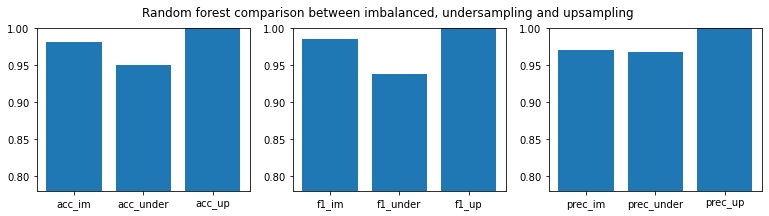

In [50]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(0.78, 1.00)
plt.bar(['acc_im', 'acc_under', 'acc_up'], [rf_eval_imbalanced[0], rf_eval_undersampled[0], rf_eval_upsampled[0]])
plt.subplot(132)
plt.ylim(0.78, 1.00)
plt.bar(['f1_im', 'f1_under','f1_up'], [rf_eval_imbalanced[1], rf_eval_undersampled[1], rf_eval_upsampled[1]])
plt.subplot(133)
plt.ylim(0.78, 1.00)
plt.bar(['prec_im', 'prec_under', 'prec_up'], [rf_eval_imbalanced[2], rf_eval_undersampled[2], rf_eval_upsampled[2]])
plt.suptitle('Random forest comparison between imbalanced, undersampling and upsampling')
plt.show()